In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureNormal_Ek.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

45/45 [==============================] - 0s 2ms/step


In [5]:
print(gender_predictions)

[[4.6396576e-04]
 [3.7104925e-04]
 [6.6962000e-04]
 ...
 [9.9882686e-01]
 [9.9909323e-01]
 [9.9771148e-01]]


In [6]:
male_rows = gender_predictions.flatten() >= 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} female samples.")

Filtered dataset contains 719 female samples.


In [7]:
df.shape

(719, 196)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489,0,1,2
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258,0,1,2
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748,0,1,2
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018,0,1,2
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [9]:
data.iloc[:,-3] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
1435     True
1436     True
1437     True
1438     True
1439     True
Name: 0.1, Length: 1440, dtype: bool

In [10]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,15.032267,17.122944,17.137267,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,15.800671,16.939402,16.786359,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,15.484927,17.181703,18.043089,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,15.257555,16.719364,17.726324,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,16.251168,17.629721,16.558219,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [12]:
y

60      1
61      1
62      1
63      1
64      2
       ..
1435    8
1436    8
1437    8
1438    8
1439    8
Name: 0.2, Length: 719, dtype: int64

In [13]:
X_speaker

60       2
61       2
62       2
63       2
64       2
        ..
1435    24
1436    24
1437    24
1438    24
1439    24
Name: speaker, Length: 719, dtype: int64

In [14]:
X.shape, y.shape

((719, 193), (719,))

In [15]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
300,-709.663391,65.366447,-24.627344,14.103768,-4.919573,-7.547902,-15.181890,-7.481339,-12.545525,2.884536,...,16.857493,17.889972,17.866027,31.893783,-0.106908,0.039132,0.020698,-0.076920,-0.001706,0.000288
344,-654.399048,76.151939,-15.640869,12.088924,-12.667950,-1.934980,-24.600451,-6.714761,-13.801146,3.029080,...,17.212028,17.224597,16.962619,32.227130,-0.056005,0.027262,-0.120161,-0.111633,0.046087,0.010740
99,-546.353149,38.547001,-36.428745,4.181880,-16.547018,-7.244370,-18.799999,-16.412064,-10.214040,-1.274723,...,17.371206,19.117776,18.896470,31.846695,-0.045795,0.018109,0.004883,0.088888,0.005550,0.005298
1151,-821.243652,44.453636,-5.750860,17.755814,-11.669284,2.048434,-13.393664,-6.274850,-13.048704,1.595026,...,14.400630,15.579717,15.710183,29.006845,0.000118,0.049609,0.020525,-0.010596,0.016442,0.006830
439,-520.334473,60.761497,-32.546345,14.083916,-3.880931,-9.868073,-9.369677,-11.970447,-9.463209,-0.687601,...,17.116739,18.345668,20.269685,32.229606,-0.097092,-0.027989,0.005817,0.046475,0.025678,0.028994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,-644.772583,61.138340,-13.468080,8.149558,-16.597828,-1.040846,-21.411978,-11.137970,-14.684502,-1.909690,...,15.628375,16.960961,16.436982,32.163103,-0.057815,0.065458,0.012634,0.002165,0.018058,-0.027380
226,-566.816162,43.368359,-15.307161,2.067335,-9.152300,-6.163722,-13.324579,-12.101171,-12.638726,-1.018285,...,17.029112,17.465603,17.662481,29.864309,-0.039929,0.013363,-0.034609,-0.003479,0.025737,-0.010313
570,-478.766022,73.137833,-16.414293,7.870032,-7.602270,-1.200238,-17.209576,-15.361103,-11.571535,1.926383,...,17.162428,19.912594,20.361990,31.162177,0.007285,0.001611,-0.019291,-0.024284,-0.000465,0.001735
915,-559.119263,47.521179,-13.219441,10.803747,-4.820639,-7.630402,-17.089399,-8.979336,-12.113929,3.582775,...,15.592766,16.871436,17.653203,31.580140,-0.006078,0.050865,0.016923,-0.080251,0.019615,0.001849


In [17]:
X_speaker

300      6
344      6
99       2
1151    20
439      8
        ..
191      4
226      4
570     10
915     16
222      4
Name: speaker, Length: 719, dtype: int64

In [18]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [19]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X.shape, y1.shape

((719, 193), (719, 8))

In [21]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [22]:
X2.shape, X2_speaker.shape, y2.shape

((719, 193), (719,), (719,))

In [23]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [24]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [25]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-709.663391,65.366447,-24.627344,14.103768,-4.919573,-7.547902,-15.181890,-7.481339,-12.545525,2.884536,...,16.857493,17.889972,17.866027,31.893783,-0.106908,0.039132,0.020698,-0.076920,-0.001706,0.000288
1,-654.399048,76.151939,-15.640869,12.088924,-12.667950,-1.934980,-24.600451,-6.714761,-13.801146,3.029080,...,17.212028,17.224597,16.962619,32.227130,-0.056005,0.027262,-0.120161,-0.111633,0.046087,0.010740
2,-546.353149,38.547001,-36.428745,4.181880,-16.547018,-7.244370,-18.799999,-16.412064,-10.214040,-1.274723,...,17.371206,19.117776,18.896470,31.846695,-0.045795,0.018109,0.004883,0.088888,0.005550,0.005298
3,-821.243652,44.453636,-5.750860,17.755814,-11.669284,2.048434,-13.393664,-6.274850,-13.048704,1.595026,...,14.400630,15.579717,15.710183,29.006845,0.000118,0.049609,0.020525,-0.010596,0.016442,0.006830
4,-520.334473,60.761497,-32.546345,14.083916,-3.880931,-9.868073,-9.369677,-11.970447,-9.463209,-0.687601,...,17.116739,18.345668,20.269685,32.229606,-0.097092,-0.027989,0.005817,0.046475,0.025678,0.028994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,-644.772583,61.138340,-13.468080,8.149558,-16.597828,-1.040846,-21.411978,-11.137970,-14.684502,-1.909690,...,15.628375,16.960961,16.436982,32.163103,-0.057815,0.065458,0.012634,0.002165,0.018058,-0.027380
715,-566.816162,43.368359,-15.307161,2.067335,-9.152300,-6.163722,-13.324579,-12.101171,-12.638726,-1.018285,...,17.029112,17.465603,17.662481,29.864309,-0.039929,0.013363,-0.034609,-0.003479,0.025737,-0.010313
716,-478.766022,73.137833,-16.414293,7.870032,-7.602270,-1.200238,-17.209576,-15.361103,-11.571535,1.926383,...,17.162428,19.912594,20.361990,31.162177,0.007285,0.001611,-0.019291,-0.024284,-0.000465,0.001735
717,-559.119263,47.521179,-13.219441,10.803747,-4.820639,-7.630402,-17.089399,-8.979336,-12.113929,3.582775,...,15.592766,16.871436,17.653203,31.580140,-0.006078,0.050865,0.016923,-0.080251,0.019615,0.001849


In [26]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,6
1,6
2,2
3,20
4,8
...,...
714,4
715,4
716,10
717,16


In [27]:
speakers = X_speaker.unique()
speakers

array([ 6,  2, 20,  8,  4, 18, 24, 12, 16, 22, 14, 10], dtype=int64)

In [28]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,6
1,6
2,2
3,20
4,8
...,...
714,4
715,4
716,10
717,16


In [29]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-709.663391,65.366447,-24.627344,14.103768,-4.919573,-7.547902,-15.181890,-7.481339,-12.545525,2.884536,...,17.889972,17.866027,31.893783,-0.106908,0.039132,0.020698,-0.076920,-0.001706,0.000288,6
1,-654.399048,76.151939,-15.640869,12.088924,-12.667950,-1.934980,-24.600451,-6.714761,-13.801146,3.029080,...,17.224597,16.962619,32.227130,-0.056005,0.027262,-0.120161,-0.111633,0.046087,0.010740,6
2,-546.353149,38.547001,-36.428745,4.181880,-16.547018,-7.244370,-18.799999,-16.412064,-10.214040,-1.274723,...,19.117776,18.896470,31.846695,-0.045795,0.018109,0.004883,0.088888,0.005550,0.005298,2
3,-821.243652,44.453636,-5.750860,17.755814,-11.669284,2.048434,-13.393664,-6.274850,-13.048704,1.595026,...,15.579717,15.710183,29.006845,0.000118,0.049609,0.020525,-0.010596,0.016442,0.006830,20
4,-520.334473,60.761497,-32.546345,14.083916,-3.880931,-9.868073,-9.369677,-11.970447,-9.463209,-0.687601,...,18.345668,20.269685,32.229606,-0.097092,-0.027989,0.005817,0.046475,0.025678,0.028994,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,-644.772583,61.138340,-13.468080,8.149558,-16.597828,-1.040846,-21.411978,-11.137970,-14.684502,-1.909690,...,16.960961,16.436982,32.163103,-0.057815,0.065458,0.012634,0.002165,0.018058,-0.027380,4
715,-566.816162,43.368359,-15.307161,2.067335,-9.152300,-6.163722,-13.324579,-12.101171,-12.638726,-1.018285,...,17.465603,17.662481,29.864309,-0.039929,0.013363,-0.034609,-0.003479,0.025737,-0.010313,4
716,-478.766022,73.137833,-16.414293,7.870032,-7.602270,-1.200238,-17.209576,-15.361103,-11.571535,1.926383,...,19.912594,20.361990,31.162177,0.007285,0.001611,-0.019291,-0.024284,-0.000465,0.001735,10
717,-559.119263,47.521179,-13.219441,10.803747,-4.820639,-7.630402,-17.089399,-8.979336,-12.113929,3.582775,...,16.871436,17.653203,31.580140,-0.006078,0.050865,0.016923,-0.080251,0.019615,0.001849,16


In [34]:
# Get random 5 speakers

speaker_counts = X_combined['speaker'].value_counts()
selected_speakers = np.random.choice(speakers, size=5, replace=False)

print("Selected speakers:", selected_speakers)

Selected speakers: [20 22  2 24  6]


In [35]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=715
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='ravdess_speaker_female_v2'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 20
Train speakers: [ 2  4  6  8 10 12 14 16 18 22 24]
No overlap in fold 0.
Selected FS indices: [  0   2   1  10   6   5 105  68 164 139 102 170  65 152 143 131 145  14
  45  27   3  16  15  19  52  93 144 185 191 180 177 121  76  53  28  21
  58  78 103 123  98  67  90  71  32  31 135 165 150 167 166 111 189 187
 151  43  69  92 117 142 146 156 127 137 168 140 163 176 175 172 169 184
 188 158  50  51  75  86 148 114  60 108 153 133 171 119  40  42  47  54
  72 124 109  62  95 106 149 160 162  97 141 138 125  99  63  57 107 173
 132  96  83 126 116  94 115  48  85 104 155 154 157 178  59  55 129]
0
Epoch 1/700
21/21 [==============================] - 5s 126ms/step - loss: 2.2350 - accuracy: 0.1775 - val_loss: 2.5218 - val_accuracy: 0.1333
Epoch 2/700
21/21 [==============================] - 2s 107ms/step - loss: 1.9797 - accuracy: 0.2155 - val_loss: 2.0459 - val_accuracy: 0.1667
Epoch 3/700
21/21 [==============================] - 2s 107ms/step - loss: 1.9283 - ac

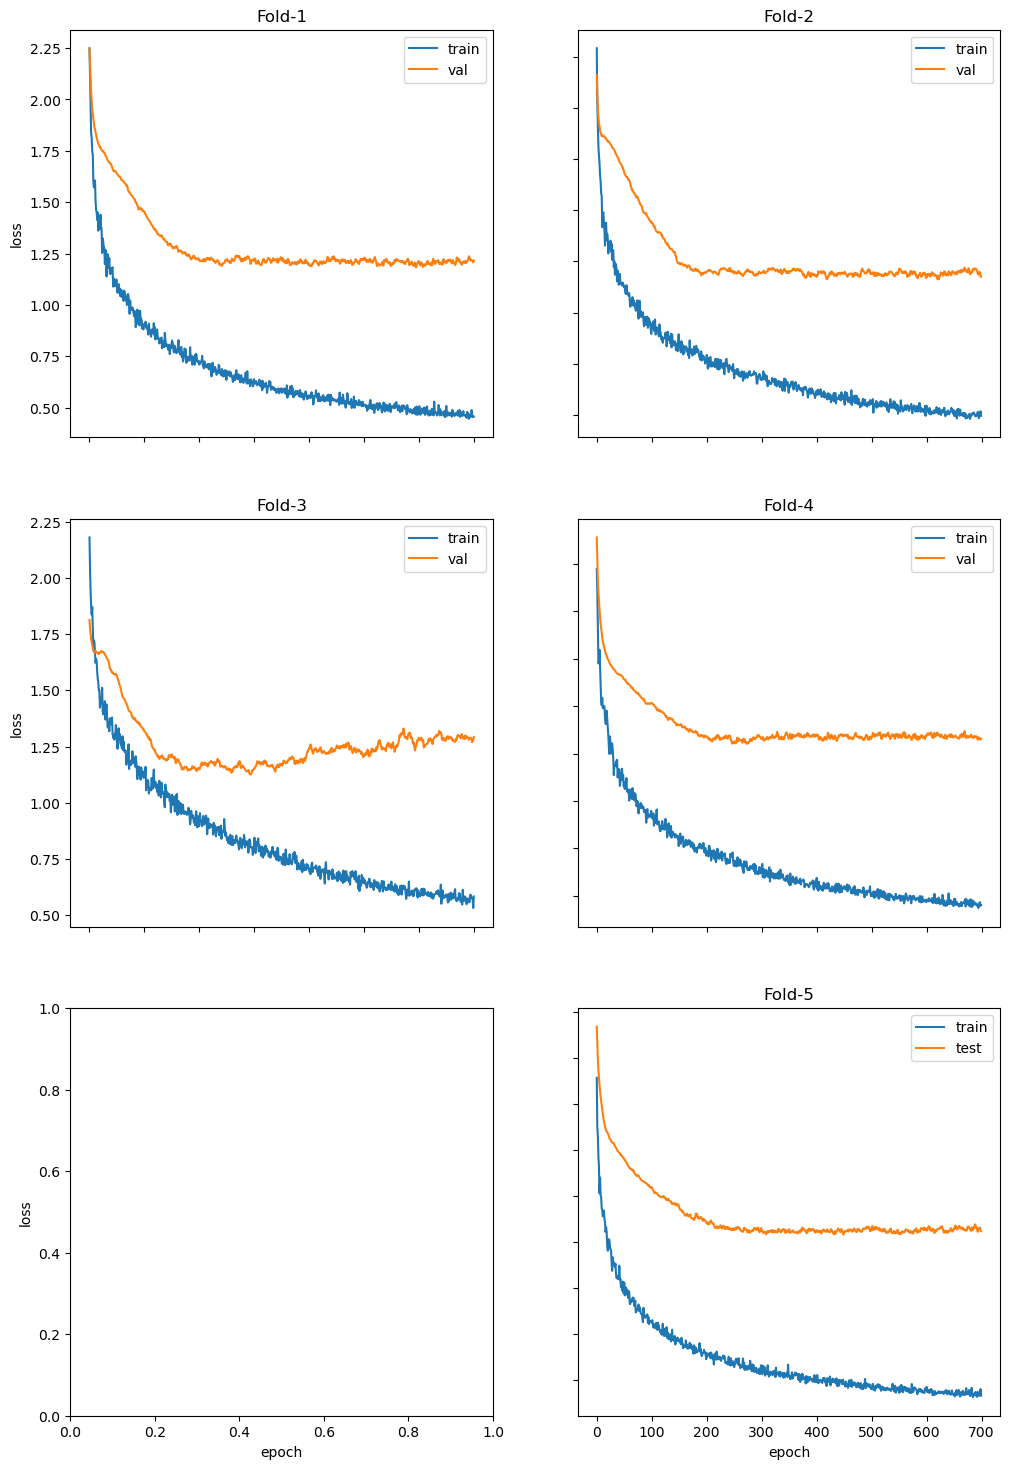

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [46]:
# loading json and creating model
from keras.models import model_from_json
savedir='ravdess_speaker_female_v2'
m='Model_3'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [48]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00005, decay=1e-6)

Xloaded=np.load(savedir+'/X3.npy')
yloaded=np.load(savedir+'/y3.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 63.33%


Fold 0: 46.67%

Fold 1: 50.85%

Fold 2: 61.67%

Fold 3: 63.33%

Fold 4: 55.00%

In [49]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 22ms/step
(60, 8)
60


array([[1, 2, 0, 0, 0, 0, 1, 0],
       [0, 7, 0, 1, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 1, 0, 1],
       [1, 3, 0, 1, 0, 0, 0, 3],
       [0, 0, 0, 0, 8, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 2, 1],
       [0, 0, 4, 0, 0, 0, 3, 1],
       [0, 0, 0, 0, 0, 0, 1, 7]], dtype=int64)

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 25.   50.    0.    0.    0.    0.   25.    0. ]
 [  0.   87.5   0.   12.5   0.    0.    0.    0. ]
 [  0.    0.   75.    0.    0.   12.5   0.   12.5]
 [ 12.5  37.5   0.   12.5   0.    0.    0.   37.5]
 [  0.    0.    0.    0.  100.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.   62.5  25.   12.5]
 [  0.    0.   50.    0.    0.    0.   37.5  12.5]
 [  0.    0.    0.    0.    0.    0.   12.5  87.5]]


           angry  calm  disgust  fearful  happy  neutral   sad  surprised
angry       25.0  50.0      0.0      0.0    0.0      0.0  25.0        0.0
calm         0.0  87.5      0.0     12.5    0.0      0.0   0.0        0.0
disgust      0.0   0.0     75.0      0.0    0.0     12.5   0.0       12.5
fearful     12.5  37.5      0.0     12.5    0.0      0.0   0.0       37.5
happy        0.0   0.0      0.0      0.0  100.0      0.0   0.0        0.0
neutral      0.0   0.0      0.0      0.0    0.0     62.5  25.0       12.5
sad          0.0   0.0     50.0      0.0    0.0      0.0  37.5       12.5
surprised    0.0   0.0      0.0      0.0    0.0      0.0  12.5       87.5



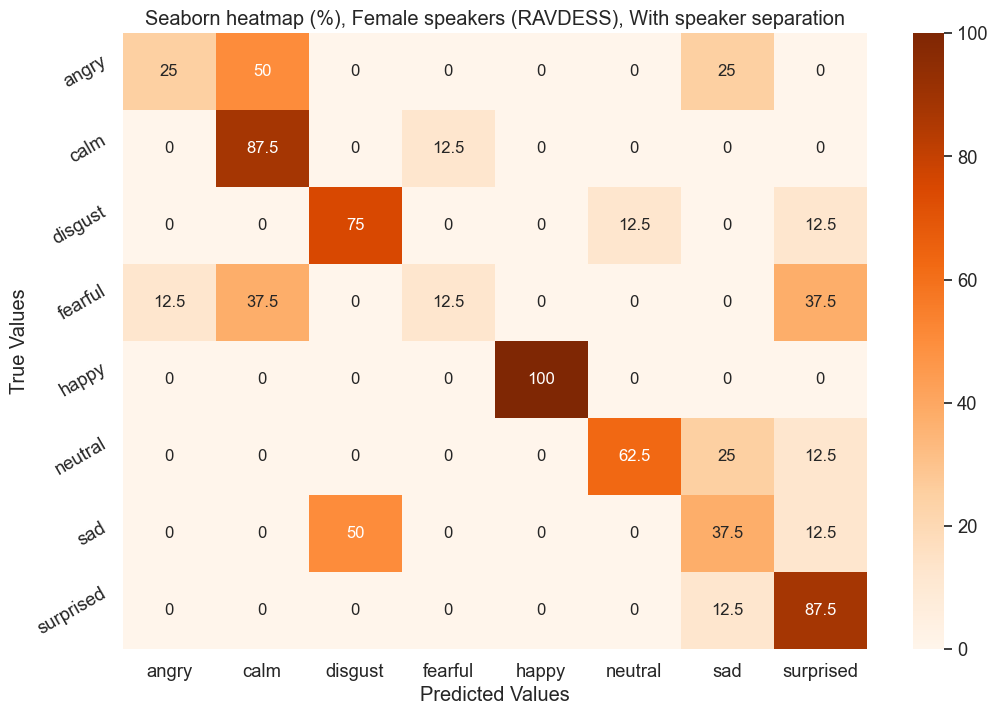

In [54]:
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Female speakers (RAVDESS), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()